Logistic Regression

Importing the libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [66]:
dataset = pd.read_csv('social_network_ads.csv')

In [67]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

------------------------------------------------

Spliting the dataset into the Training set & Test set

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

------------------------------------------------

Feature Scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc_X = StandardScaler()

In [71]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Fitting Logistic Regression to the Training set

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [73]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predicting the Test set results

In [74]:
y_pred = classifier.predict(X_test)

print("accuracy: {}".format(accuracy_score(y_test, y_pred)))

accuracy: 0.89


Making the Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[65  3]
 [ 8 24]]


Visualising the Training set results

In [77]:
from matplotlib.colors import ListedColormap

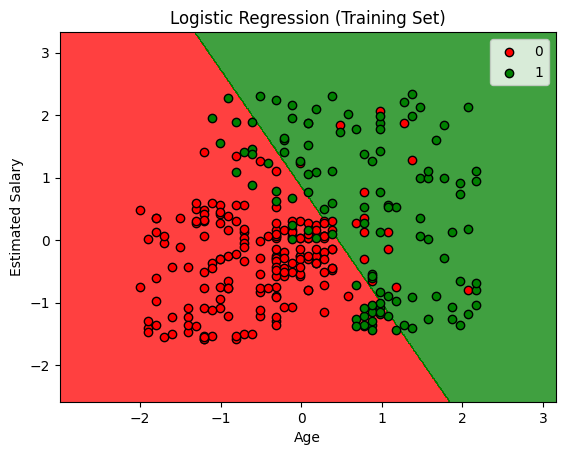

In [78]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j, edgecolor='black')
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualising the Test set results

In [79]:
from matplotlib.colors import ListedColormap

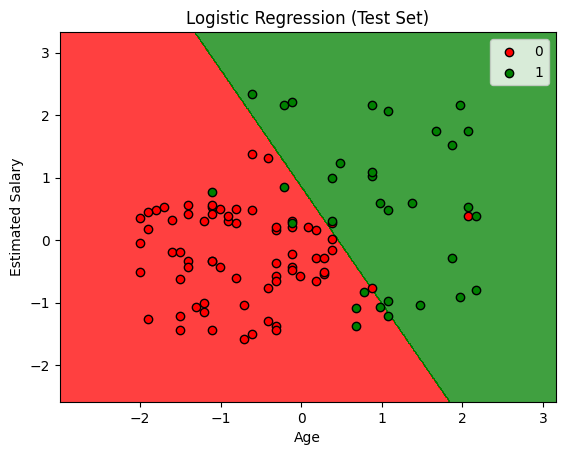

In [80]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j, edgecolor='black')
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()